#  Reworking GARFIELD analysis
After getting some feedback, I've realized the garfield analysis I've done is described pretty generally in my draft, so I'm going to dive a bit more into these results and put concrete values to the trends I've observed

In [1]:
library(data.table)
library(tidyverse)
library(ggsci)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
garfield_marginal <- fread("../../../1kg_ld_data/output/mqtl_delahaye_richs_meta/garfield.test.mqtl_delahaye_richs_meta.out")
garfield_male <- fread("../../../1kg_ld_data/output/mqtl_delahaye_richs_male_meta/garfield.test.mqtl_delahaye_richs_male_meta.out")
garfield_female <- fread("../../../1kg_ld_data/output/mqtl_delahaye_richs_female_meta/garfield.test.mqtl_delahaye_richs_female_meta.out")

garfield_sex <- fread("../../../1kg_ld_data/output/mqtl_delahaye_richs_sex_meta/garfield.test.mqtl_delahaye_richs_sex_meta.out")
garfield_cord <- fread("../../../1kg_ld_data/output/mqtl_aries_cord/garfield.test.mqtl_aries_cord.out")
garfield_sex$Model = "Sex-dependent"
garfield_male$Model <- "Male-stratified"
garfield_female$Model <- "Female-stratified"
garfield_marginal$Model = "Cross-sex"
garfield_cord$Model = "Cord blood"

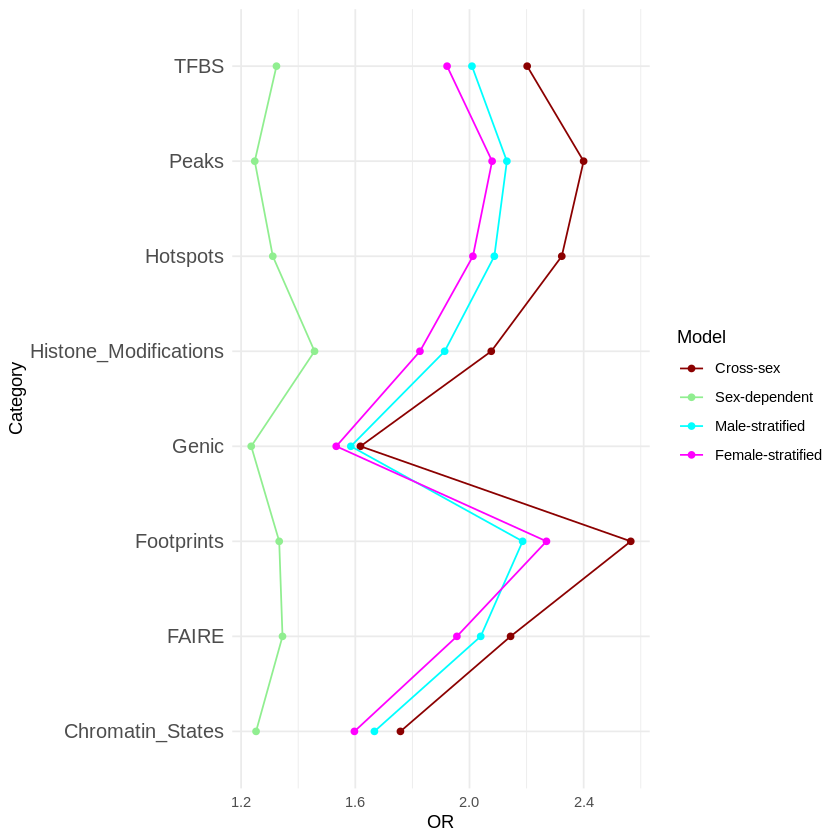

In [3]:
garfield <- rbindlist(list(garfield_male,garfield_female,garfield_sex,garfield_marginal,garfield_cord))[Model != "Cord blood" & PThresh == 1e-9] 
garfield$Model <- factor(garfield$Model, levels = c("Cross-sex","Sex-dependent","Male-stratified","Female-stratified"))
garfield$Tissue <- str_to_title(gsub("_"," ",garfield$Tissue))
garfield$Tissue <- stringr::str_pad(garfield$Tissue,width=30,side="left",pad = " ")
to_plot <- garfield[,.(OR=mean(OR)),by=c("Model","Category")]
ggplot(to_plot,aes(Category,OR,color=Model,group=Model)) +    
    geom_point(position = "identity", stat="identity") +
    geom_line()+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    coord_flip() + 
    theme_minimal() +
    theme(strip.text.y = element_text(size=30),axis.text.y=element_text(size=12))

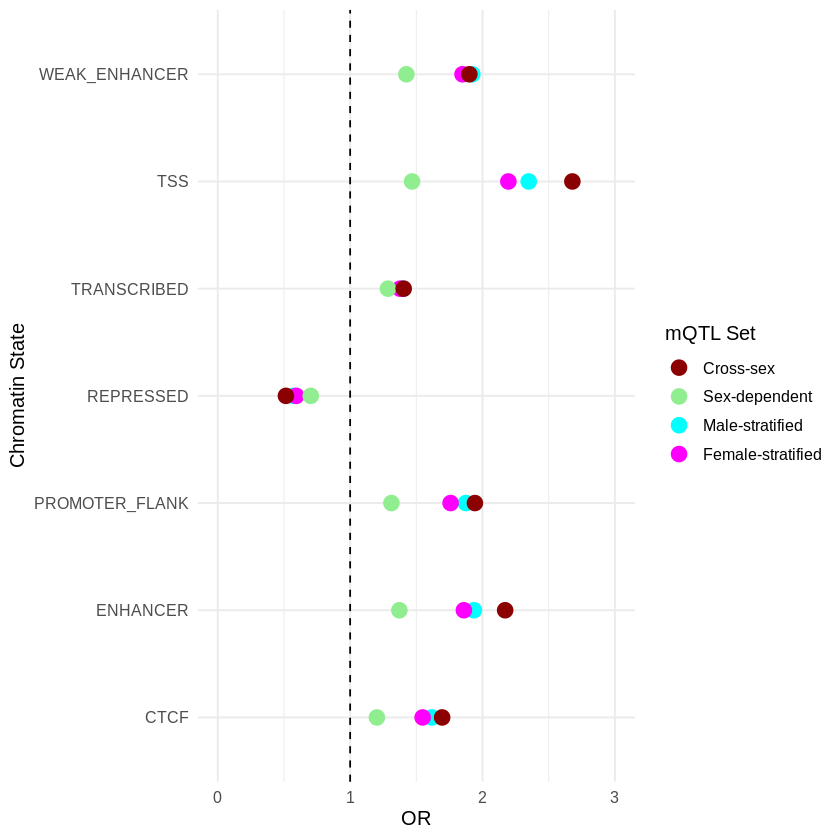

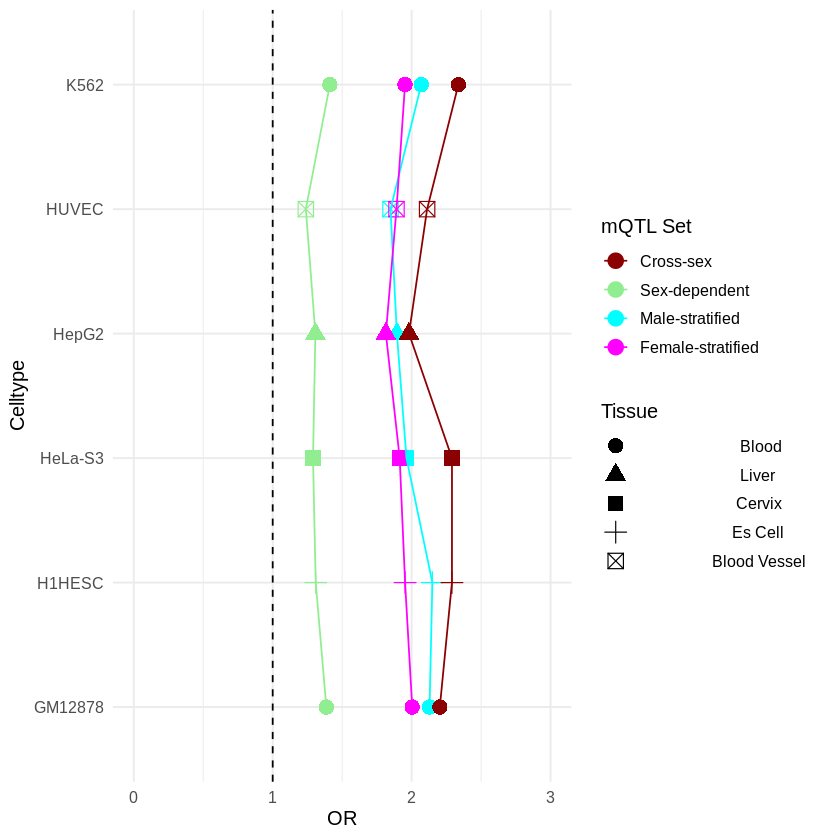

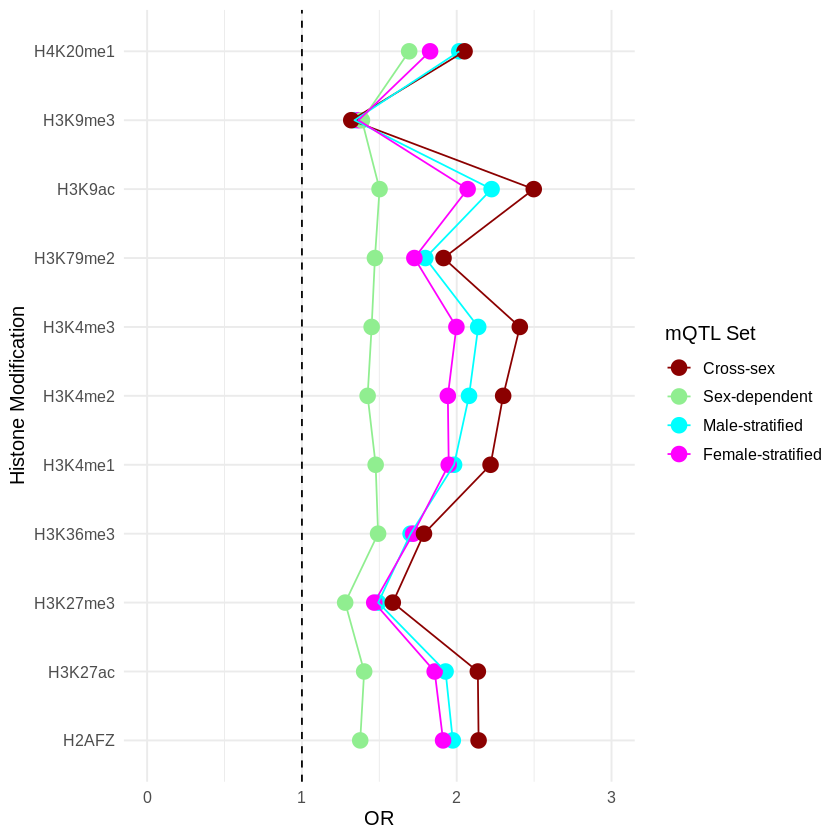

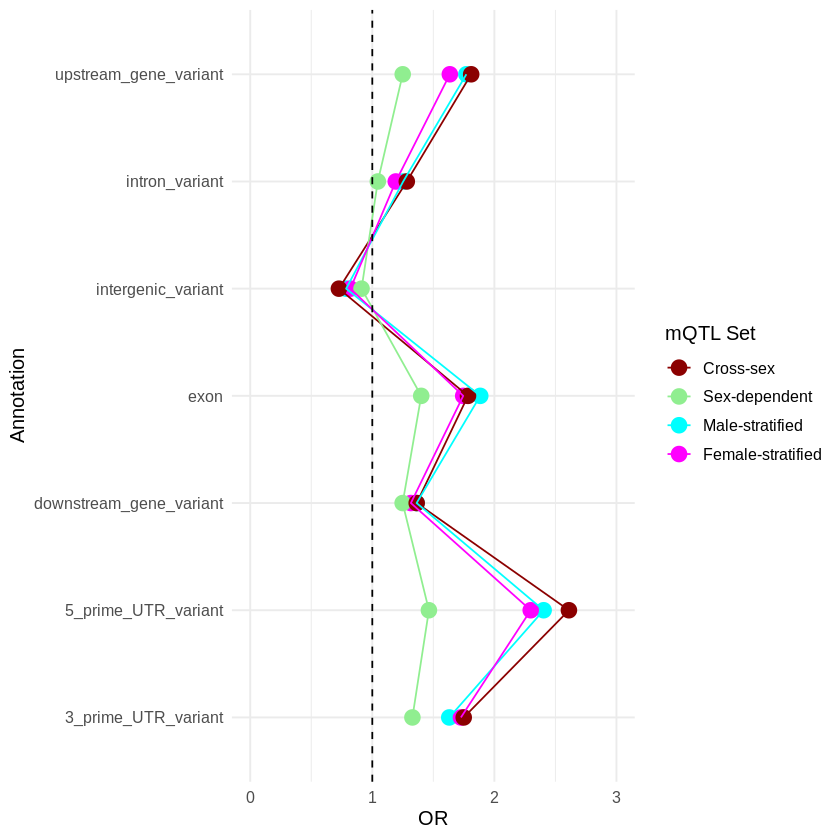

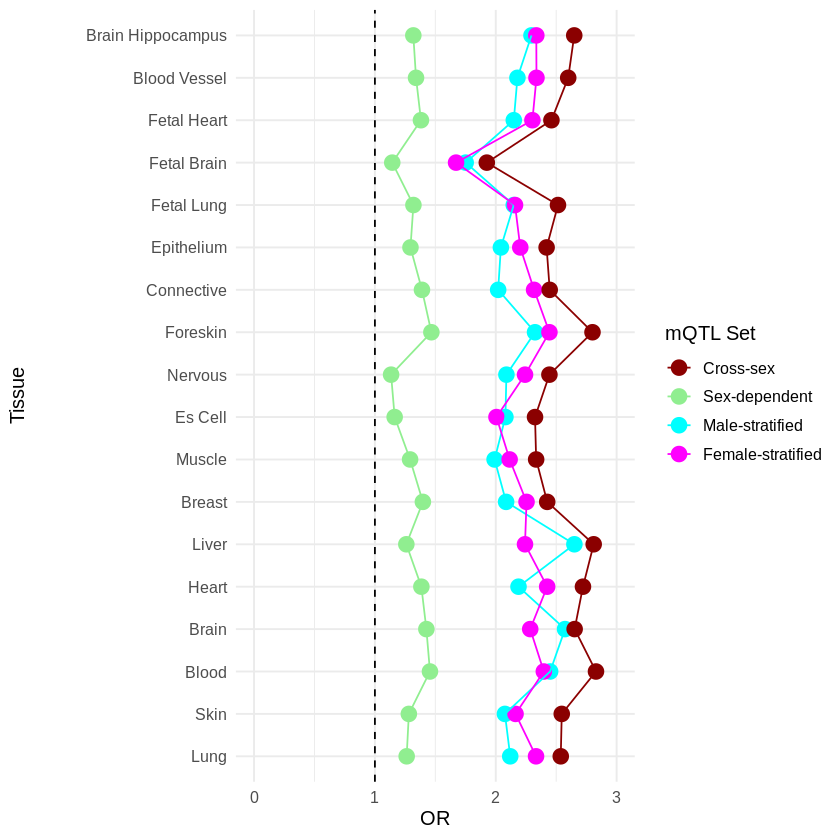

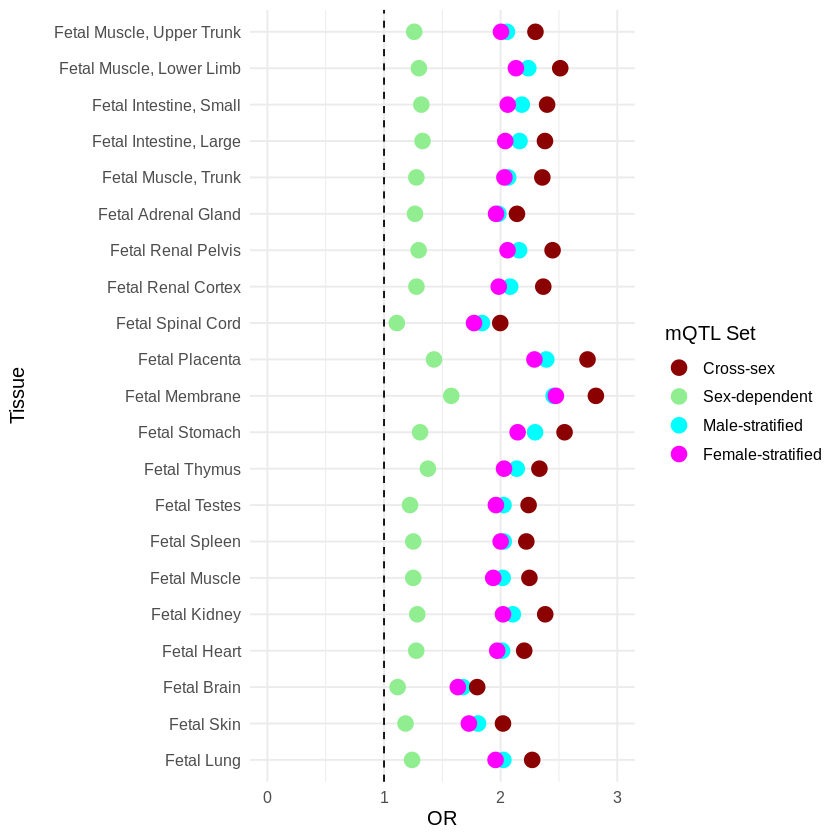

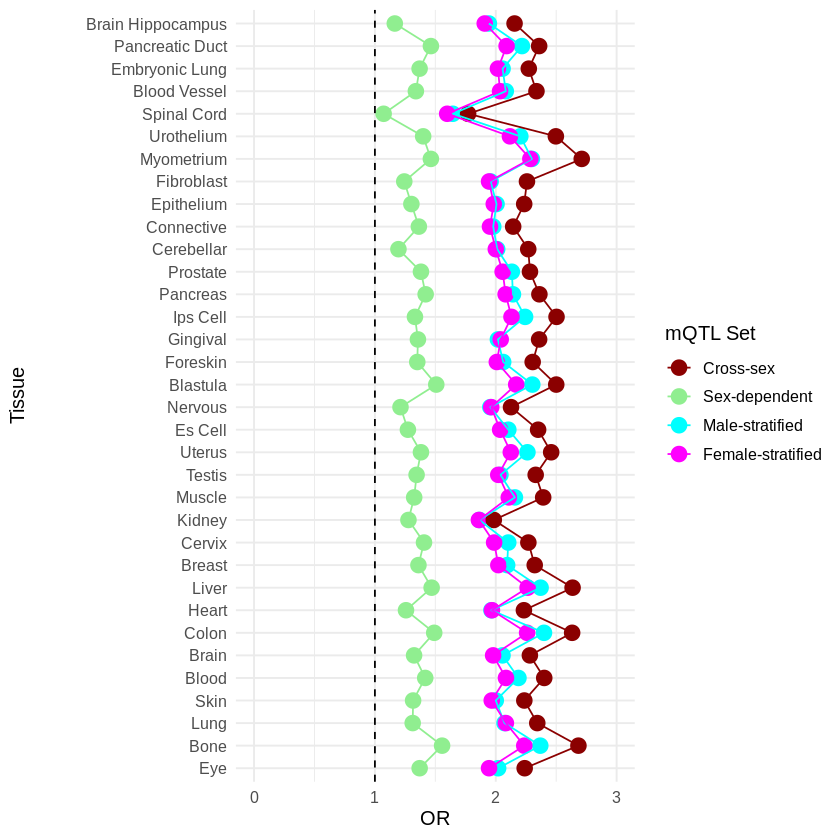

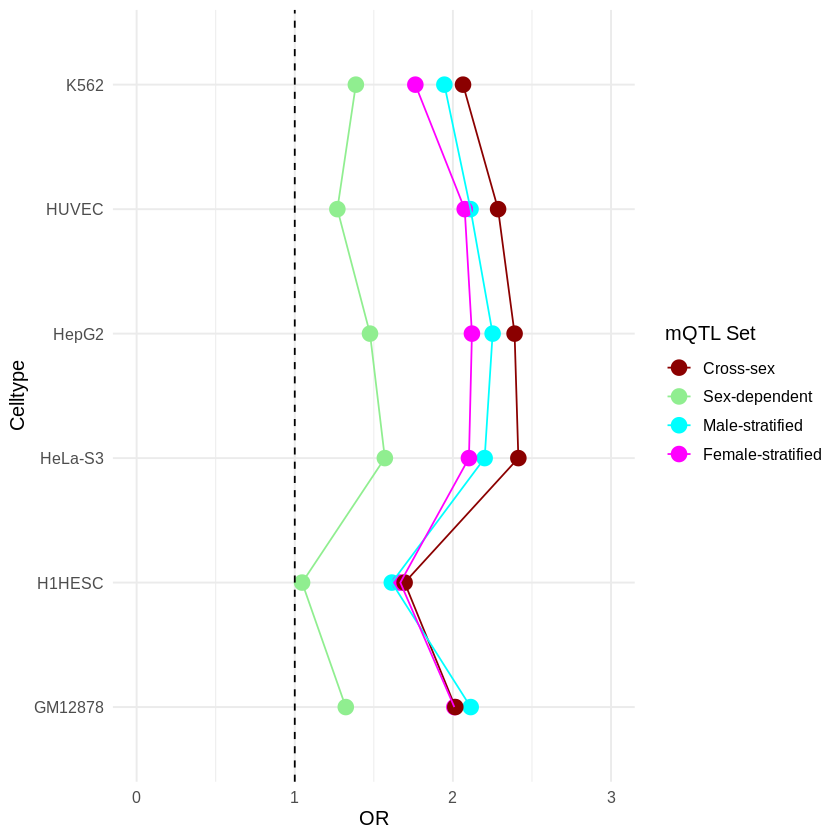

In [12]:
ggplot(garfield[Category == "Chromatin_States",.(OR=mean(OR)),by=c("Model","Type")],aes(Type,OR,color = Model,group=Model)) + 
    geom_point(size=4) + 
#    geom_line()+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set",x="Chromatin State")+
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)

ggplot(garfield[Category == "TFBS"],aes(Celltype,OR,color = Model,group=Model,shape=Tissue)) + 
    geom_point(size=4) + 
    geom_line()+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set")+
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)

ggplot(garfield[Category == "Histone_Modifications",.(OR=mean(OR)),by=c("Model","Type")],aes(Type,OR,color = Model,group=Model)) + 
    geom_point(size=4) + 
    geom_line()+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set",x="Histone Modification") +
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)

ggplot(garfield[Category == "Genic"],aes(Annotation,OR,color = Model,group=Model)) + 
    geom_point(size=4) + 
    geom_line()+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set")+
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)

ggplot(garfield[Category == "Footprints",.(OR=mean(OR)),by=c("Model","Tissue")],aes(Tissue,OR,color = Model,group=Model)) + 
    geom_point(size=4) + 
    geom_line()+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set")+
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)

ggplot(garfield[Category == "Hotspots" & grepl("Fetal",Tissue),.(OR=mean(OR)),by=c("Model","Tissue")],aes(Tissue,OR,color = Model,group=Model)) + 
    geom_point(size=4) + 
 #   geom_line()+
    labs(x="Tissue",color="Category")+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set")+
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)


ggplot(garfield[Category == "Hotspots" & !grepl("Fetal",Tissue),.(OR=mean(OR)),by=c("Model","Tissue")],aes(Tissue,OR,color = Model,group=Model)) + 
    geom_point(size=4) + 
    geom_line()+
    labs(x="Tissue",color="Category")+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set")+
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)


ggplot(garfield[Category == "FAIRE"],aes(Celltype,OR,color = Model,group=Model)) + 
    geom_point(size=4) + 
    geom_line()+
    geom_hline(linetype="dashed",yintercept = 1)+
    scale_color_manual(values=c("dark red","light green","cyan","magenta")) +
    labs(color="mQTL Set")+
    coord_flip(ylim=c(0,3)) + 
    theme_minimal(base_size = 12)

In [27]:
garfield[Category == "Chromatin_States",.(mean(OR)),by=c("Type","Model")]
garfield[Category == "Chromatin_States" & Type != "TSS",.(mean(OR)),by=c("Model")]

Type,Model,V1
<chr>,<fct>,<dbl>
CTCF,Male-stratified,1.6170303
ENHANCER,Male-stratified,1.9350721
PROMOTER_FLANK,Male-stratified,1.8746720
REPRESSED,Male-stratified,0.5716444
TRANSCRIBED,Male-stratified,1.3981409
TSS,Male-stratified,2.3489028
WEAK_ENHANCER,Male-stratified,1.9230495
CTCF,Female-stratified,1.5475069
ENHANCER,Female-stratified,1.8591070


Model,V1
<fct>,<dbl>
Male-stratified,1.553268
Female-stratified,1.497185
Sex-dependent,1.216421
Cross-sex,1.604670


In [9]:
garfield[Category == "Hotspots" & grepl("fetal",Tissue),.(OR=mean(OR)),by=c("Model","Tissue")] %>% group_by(Model) %>%  top_n(n=5,wt=OR) %>% arrange(Model,-OR)
garfield[Category == "Hotspots" & !grepl("fetal",Tissue),.(OR=mean(OR)),by=c("Model","Tissue")] %>% group_by(Model) %>%  top_n(n=5,wt=OR) %>% arrange(Model,-OR)

Model,Tissue,OR
<fct>,<chr>,<dbl>
Cross-sex,fetal_membrane,2.816550
Cross-sex,fetal_placenta,2.744907
Cross-sex,fetal_stomach,2.548078
Cross-sex,"fetal_muscle,_lower_limb",2.511052
Cross-sex,fetal_renal_pelvis,2.445366
Sex-dependent,fetal_membrane,1.576362
Sex-dependent,fetal_placenta,1.428410
Sex-dependent,fetal_thymus,1.376297
Sex-dependent,"fetal_intestine,_large",1.330259


Model,Tissue,OR
<fct>,<chr>,<dbl>
Cross-sex,myometrium,2.711281
Cross-sex,bone,2.683932
Cross-sex,liver,2.635612
Cross-sex,colon,2.631950
Cross-sex,ips_cell,2.502736
Sex-dependent,bone,1.555873
Sex-dependent,blastula,1.507736
Sex-dependent,colon,1.490787
Sex-dependent,liver,1.469479


In [10]:
garfield[Category == "Histone_Modifications",.(OR=mean(OR)),by=c("Model","Type")] %>% group_by(Model) %>%  top_n(n=5,wt=OR) %>% arrange(Model,-OR)

Model,Type,OR
<fct>,<chr>,<dbl>
Cross-sex,H3K9ac,2.497537
Cross-sex,H3K4me3,2.407439
Cross-sex,H3K4me2,2.299897
Cross-sex,H3K4me1,2.218450
Cross-sex,H2AFZ,2.141182
Sex-dependent,H4K20me1,1.692704
Sex-dependent,H3K9ac,1.501410
Sex-dependent,H3K36me3,1.491929
Sex-dependent,H3K4me1,1.476184
